In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import tyssue

from tyssue.generation.shapes import generate_ring, sheet_from_cell_centers
from tyssue import PlanarGeometry as geom
from tyssue import Sheet

from scipy.spatial import Voronoi, voronoi_plot_2d
from tyssue.generation.from_voronoi import from_2d_voronoi
from tyssue.generation.hexagonal_grids import hexa_disk
from tyssue.config.geometry import flat_sheet
from tyssue.draw import sheet_view

from tyssue.topology.base_topology import remove_face, merge_border_edges, drop_two_sided_faces, close_face

C++ extension are not available for this version


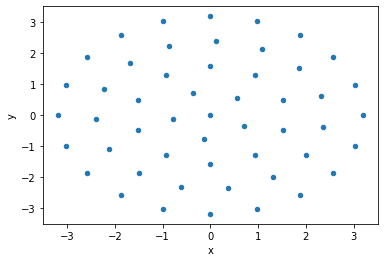

In [2]:
hexadisk = pd.DataFrame(hexa_disk(20, radius = 3.188), columns = ['x', 'y'])
hexadisk.plot.scatter(x="x", y="y")
vor = Voronoi(hexadisk.to_numpy())
dsets = from_2d_voronoi(vor)
sheet = Sheet("circle", dsets, specs=flat_sheet(), coords=['x', 'y'])
sheet.sanitize(trim_borders=True)  
geom.update_all(sheet)

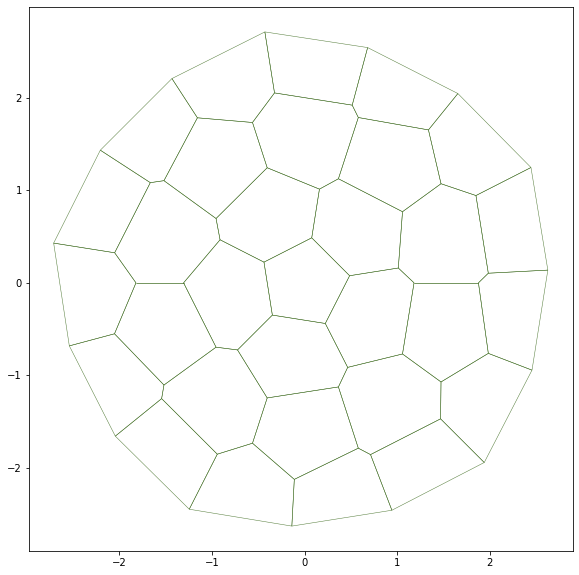

In [3]:
draw_specs = tyssue.config.draw.sheet_spec()

fig, (ax) = plt.subplots(1, figsize = (10, 10))
fig, ax = sheet_view(sheet, ax=ax)

In [4]:
face = sheet.face_df['x'].abs().idxmin()

In [5]:
# sheet.face_df['y'].abs().idxmin()

In [6]:
sheet.get_neighborhood(face, 1)

,face,order
1,25,1
2,26,1
3,27,1
4,28,1
5,29,1


In [7]:
remove_face(sheet, face)
# remove_face(sheet, 116)
# remove_face(sheet, 115)
# remove_face(sheet, 114)
# remove_face(sheet, 113)
# remove_face(sheet, 112)

merge_border_edges(sheet)
sheet.sanitize(trim_borders=True)
drop_two_sided_faces(sheet)

<Figure size 432x288 with 0 Axes>

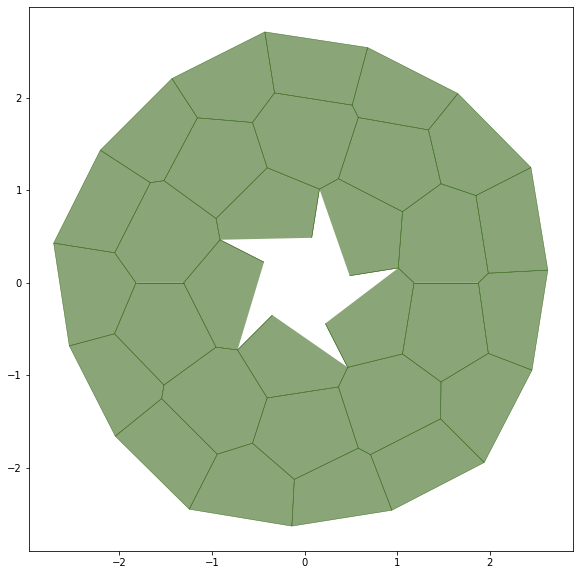

In [8]:
plt.clf()
draw_specs = tyssue.config.draw.sheet_spec()

fig, (ax) = plt.subplots(1, figsize = (10, 10))
fig, ax = sheet_view(sheet, ax=ax, face={"visible": True}, edge={'headwidth': 5.0})

In [9]:
sheet.edge_df.to_csv('out.csv', index=False)

In [10]:
sheet.sanitize(trim_borders=True)

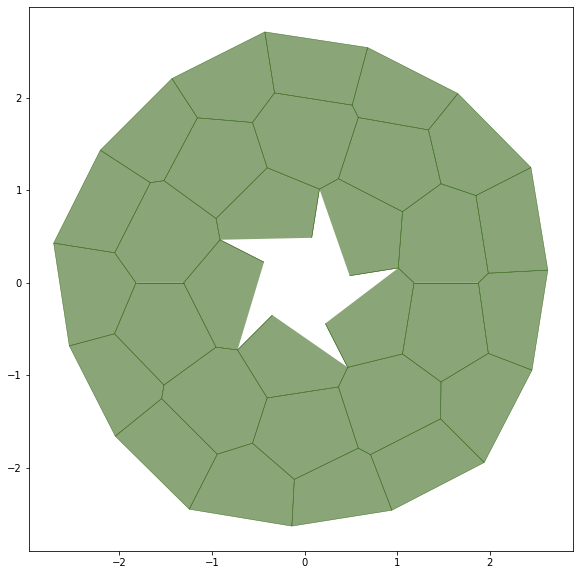

In [11]:
draw_specs = tyssue.config.draw.sheet_spec()

fig, (ax) = plt.subplots(1, figsize = (10, 10))
fig, ax = sheet_view(sheet, ax=ax, face={"visible": True}, edge={'headwidth': 5.0})

In [12]:
sheet.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,sz,tz,fz,is_active,ux,uy,is_valid,rx,ry,sub_area
edge,,,,,,,,,,,,,,,,,,,,,
0,2,0.245899,0.505366,14,0,0.275242,-0.423836,-1.433172,2.206892,-1.157930,...,0.0,0.0,0.0,1,0.275242,-0.423836,True,-0.651492,0.109819,0.122949
1,0,0.257903,0.505366,0,2,-0.275242,0.423836,-1.157930,1.783056,-1.433172,...,0.0,0.0,0.0,1,-0.275242,0.423836,True,0.438887,0.261179,0.128952
2,2,0.203685,0.769359,0,1,0.361428,0.679178,-1.519358,1.103879,-1.157930,...,0.0,0.0,0.0,1,0.361428,0.679178,True,0.077459,-0.417999,0.101842
3,1,0.331902,0.769359,16,2,-0.361428,-0.679178,-1.157930,1.783056,-1.519358,...,0.0,0.0,0.0,1,-0.361428,-0.679178,True,-0.237775,0.471493,0.165951
4,4,0.086607,0.148932,17,1,-0.147374,-0.021490,-1.519358,1.103879,-1.666732,...,0.0,0.0,0.0,1,-0.147374,-0.021490,True,-0.056940,0.579367,0.043304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,14,0.358278,1.123246,10,47,-0.182236,1.108364,2.627810,0.137718,2.445574,...,0.0,0.0,0.0,1,-0.182236,1.108364,True,0.400532,-0.470031,0.179139
151,11,0.438620,1.123246,11,14,-0.789570,0.798913,2.445574,1.246082,1.656004,...,0.0,0.0,0.0,1,-0.789570,0.798913,True,0.692692,-0.145371,0.219310
152,10,0.403394,1.094205,12,11,-0.974943,0.496758,1.656004,2.044995,0.681061,...,0.0,0.0,0.0,1,-0.974943,0.496758,True,0.702056,0.056046,0.201697
